# Perkenalan

- Aldo Dwicahyo
- Batch004

# Import Pustaka

In [42]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
warnings.filterwarnings('ignore')


# Data Loading

In [43]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [44]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


   1. age
   2. job : type of job
   3. marital : marital status
   4. education
   5. default: has credit in default?
   6. housing: has housing loan?
   7. loan: has personal loan?
   8. contact: contact communication type
   9. month: last contact month of year
  10. day_of_week: last contact day of the week
  11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  12. campaign: number of contacts performed during this campaign and for this client
  13. pdays: number of days that passed by after the client was last contacted from a previous campaign
  14. previous: number of contacts performed before this campaign and for this client
  15. poutcome: outcome of the previous marketing campaign
  16. emp.var.rate: employment variation rate - quarterly indicator
  17. cons.price.idx: consumer price index - monthly indicator     
  18. cons.conf.idx: consumer confidence index - monthly indicator    
  19. euribor3m: euribor 3 month rate - daily indicator
  20. nr.employed: number of employees - quarterly indicator

# Data Cleaning

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

mengubang y menjadi numerik untuk lebih mudah di akses

In [46]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Explorasi Data

membuat variable untuk datatype object dan numeric

In [47]:
obj_col = df.select_dtypes(include='object').columns.tolist()
num_col = df.select_dtypes(include=np.number).columns.tolist()

In [48]:
df_num = df[num_col]
df_obj = df[obj_col]

Melihat Distribusi dari y

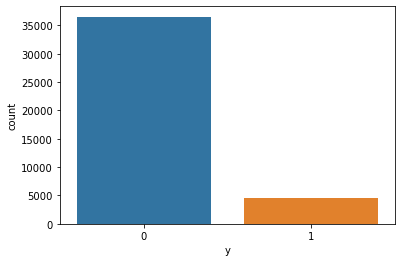

In [49]:
fig = sns.countplot(x='y', data=df)

Persentase distribusi Yes dan No dari total dataset tidak seimbang

Melihat distribusi data dari kolom job

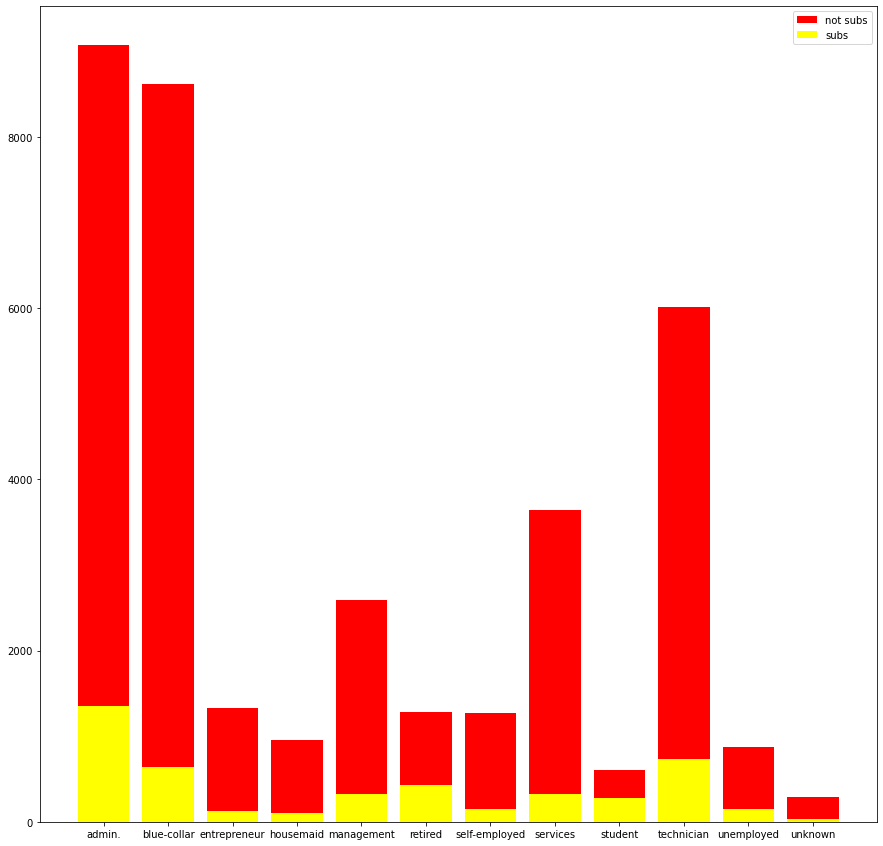

In [50]:
job = pd.crosstab(df.job, df.y).reset_index()

plt.figure(figsize=(15,15))

plt.bar(job.job, job[0], label='not subs', color='red')
plt.bar(job.job, job[1], label='subs', color='yellow')
plt.legend()

Mayoritas Pekerjaan dari dataset adalah **Admin** dibandingkan dengan pekerjaan lain 

melihat distribusi data dari kolom marital

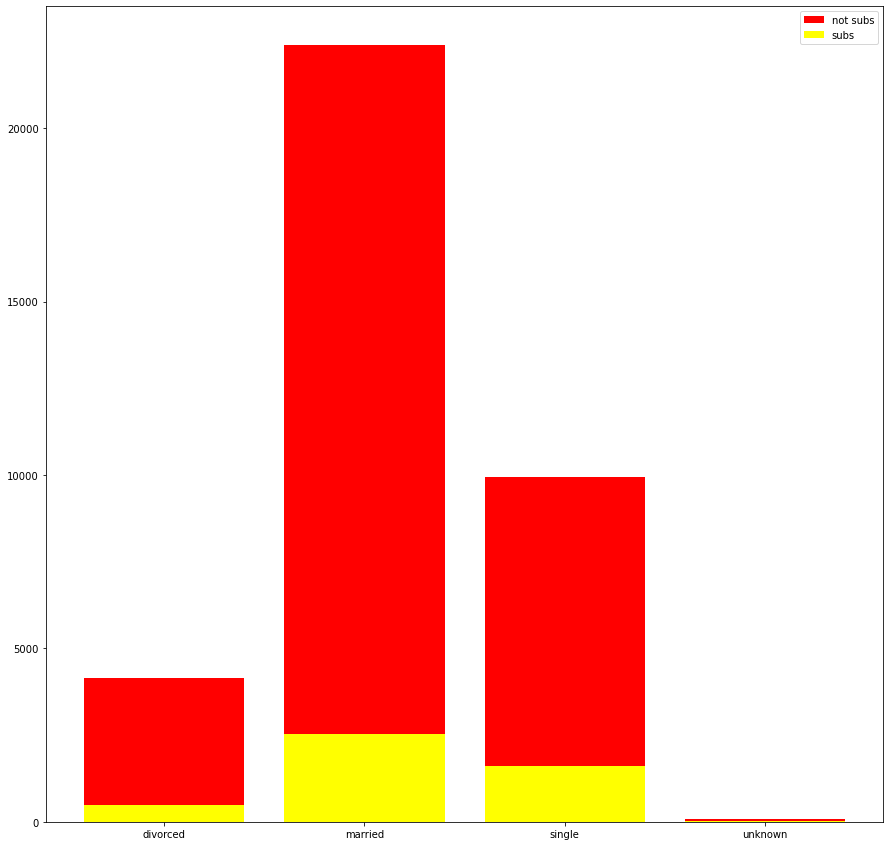

In [51]:
marital = pd.crosstab(df.marital, df.y).reset_index()

plt.figure(figsize=(15,15))

plt.bar(marital.marital, marital[0], label='not subs', color='red')
plt.bar(marital.marital, marital[1], label='subs', color='yellow')
plt.legend()

Status pernikahan paling mayoritas adalah **married** dibandingkan dengan status yang lain

melihat distribusi data dari kolom education

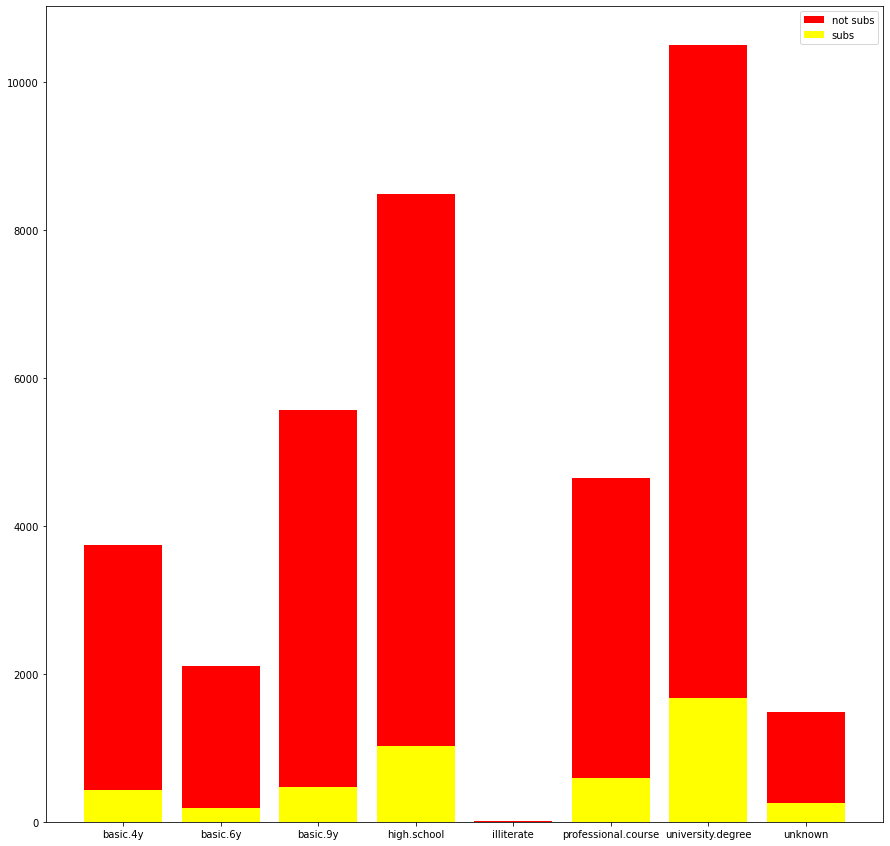

In [52]:
backgroup = pd.crosstab(df.education, df.y).reset_index()

plt.figure(figsize=(15,15))

plt.bar(backgroup.education, backgroup[0], label='not subs', color='red')
plt.bar(backgroup.education, backgroup[1], label='subs', color='yellow')
plt.legend()

Mayoritas background dari dataset adalah **university.degree** dibandingkan dengan background yang lain

melihat distribusi data dari kolom default

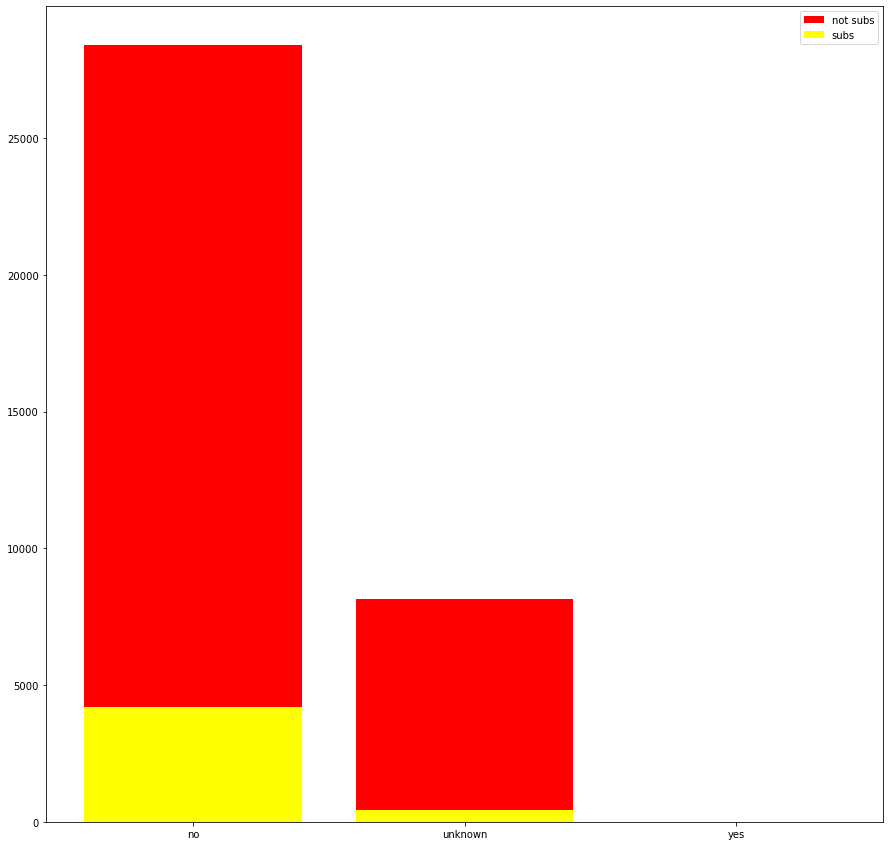

In [53]:
default = pd.crosstab(df.default, df.y).reset_index()

plt.figure(figsize=(15,15))

plt.bar(default.default, default[0], label='not subs', color='red')
plt.bar(default.default, default[1], label='subs', color='yellow')
plt.legend()

Dari data diatas mayoritas data adalah **tidak punya credit**

melihat distribusi data dari kolom housing

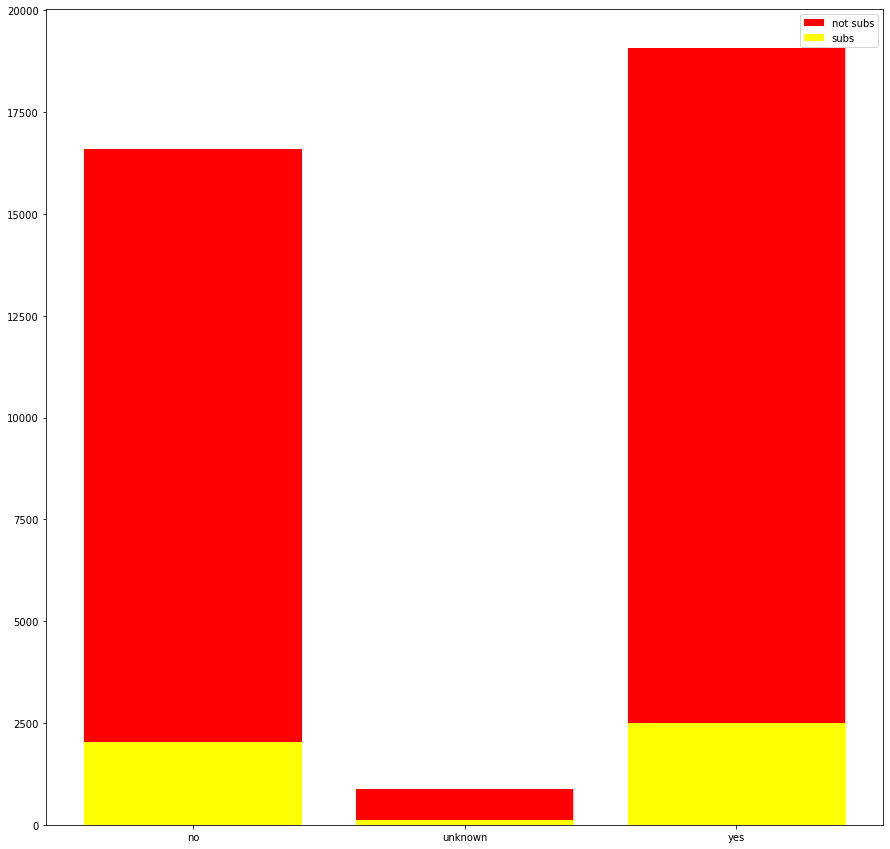

In [54]:
housing = pd.crosstab(df.housing, df.y).reset_index()

plt.figure(figsize=(15,15))

plt.bar(housing.housing, housing[0], label='not subs', color='red')
plt.bar(housing.housing, housing[1], label='subs', color='yellow')
plt.legend()

Untuk status Housing loan, mayoritas data terdistribusi ke yang **mempunyai housing loan**

melihat distribusi data dari kolom loan

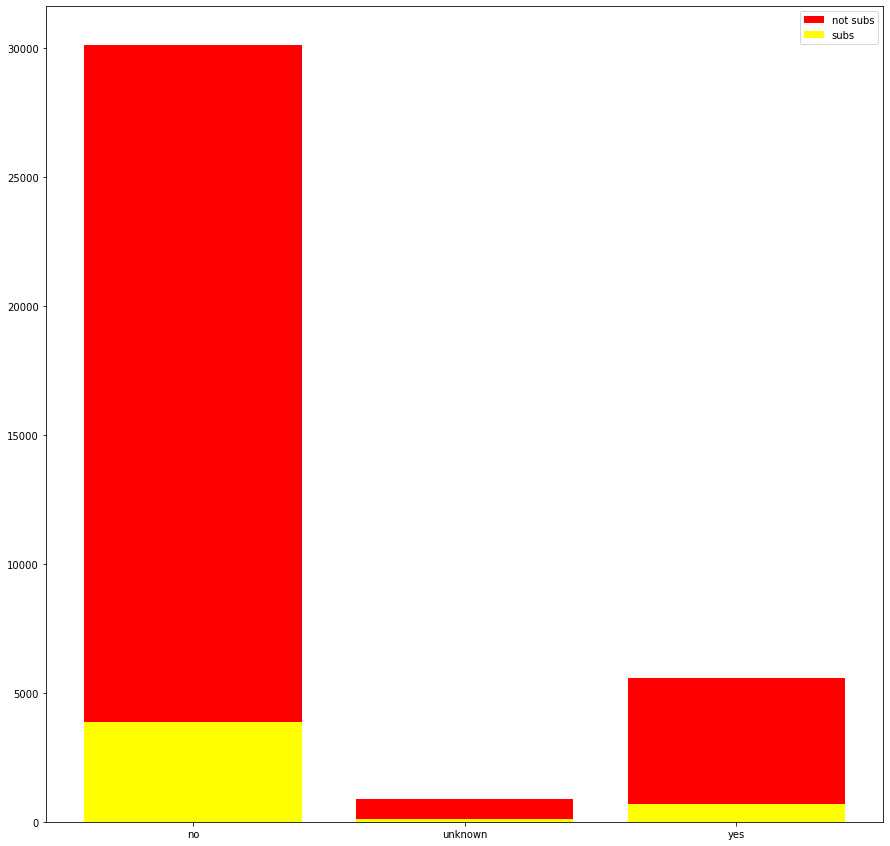

In [55]:
loan = pd.crosstab(df.loan, df.y).reset_index()

plt.figure(figsize=(15,15))

plt.bar(loan.loan, loan[0], label='not subs', color='red')
plt.bar(loan.loan, loan[1], label='subs', color='yellow')
plt.legend()

Untuk data hutang pribadi ternyata mayoritas data terdistribusi ke yang **tidak memiliki hutang pribadi**

melihat distribusi data dari kolom contact

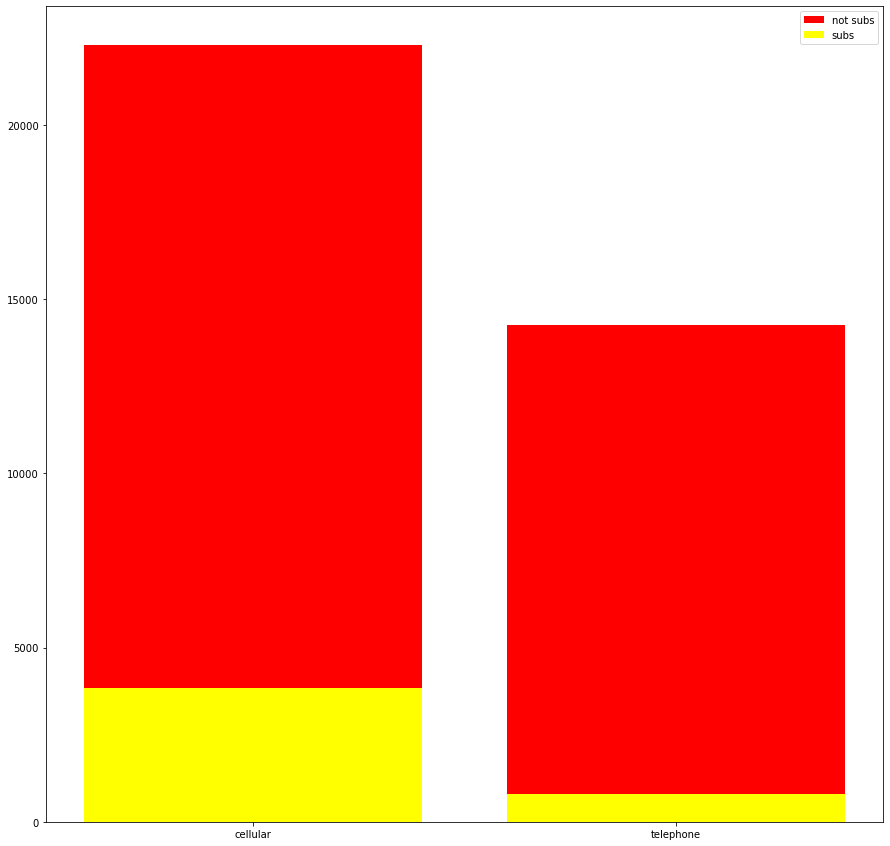

In [56]:
contact = pd.crosstab(df.contact, df.y).reset_index()

plt.figure(figsize=(15,15))

plt.bar(contact.contact, contact[0], label='not subs', color='red')
plt.bar(contact.contact, contact[1], label='subs', color='yellow')
plt.legend()

Untuk contact data, data mayoritas mengarah ke customer yang dicontact melalui **cellular**

melihat distribusi data dari kolom month

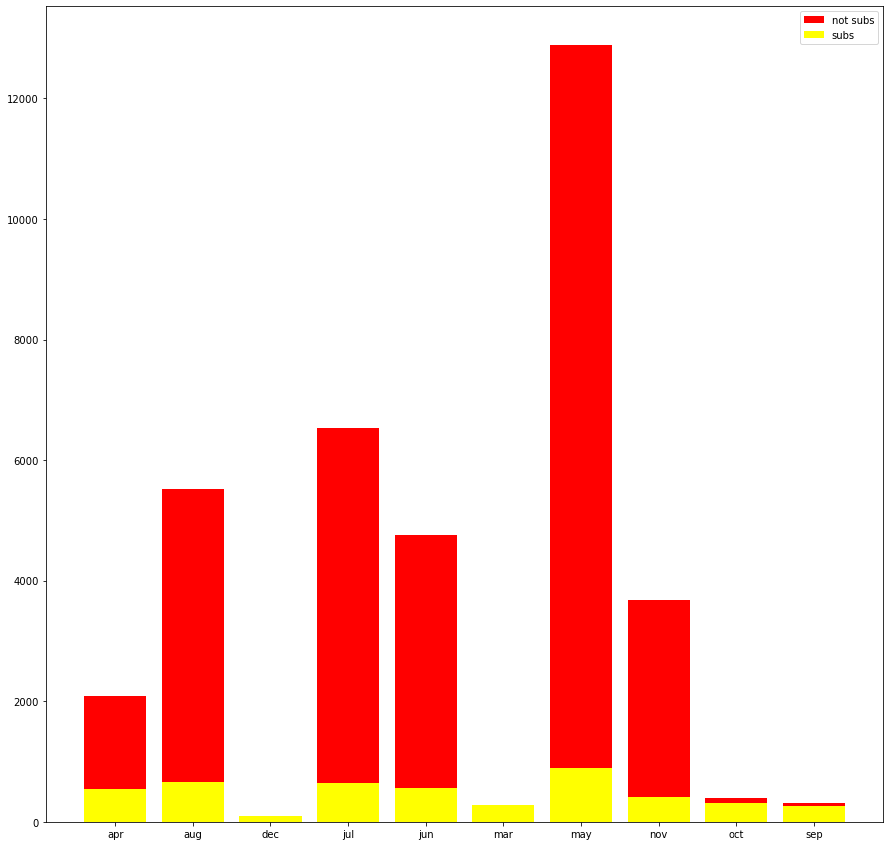

In [57]:
month = pd.crosstab(df.month, df.y).reset_index()

plt.figure(figsize=(15,15))

plt.bar(month.month, month[0], label='not subs', color='red')
plt.bar(month.month, month[1], label='subs', color='yellow')
plt.legend()

Untuk data bulan, bulan yang paling banyak melakukan pengambilan data adalah dibulan **may**

melihat distribusi data dari kolom day_of_week

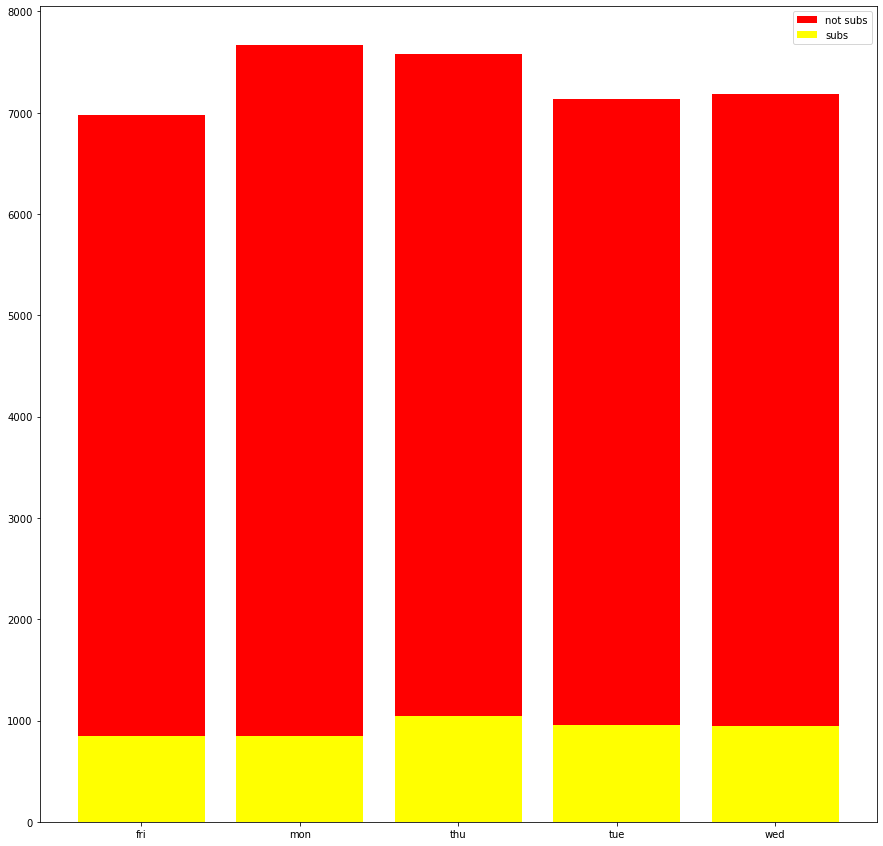

In [58]:
day_of_week = pd.crosstab(df.day_of_week, df.y).reset_index()

plt.figure(figsize=(15,15))

plt.bar(day_of_week.day_of_week, day_of_week[0], label='not subs', color='red')
plt.bar(day_of_week.day_of_week, day_of_week[1], label='subs', color='yellow')
plt.legend()

untuk data hari contach perminggu, data terdistribusi secara merata

Mencari kolom yang mempunyai korelasi terhadap label

<AxesSubplot:>

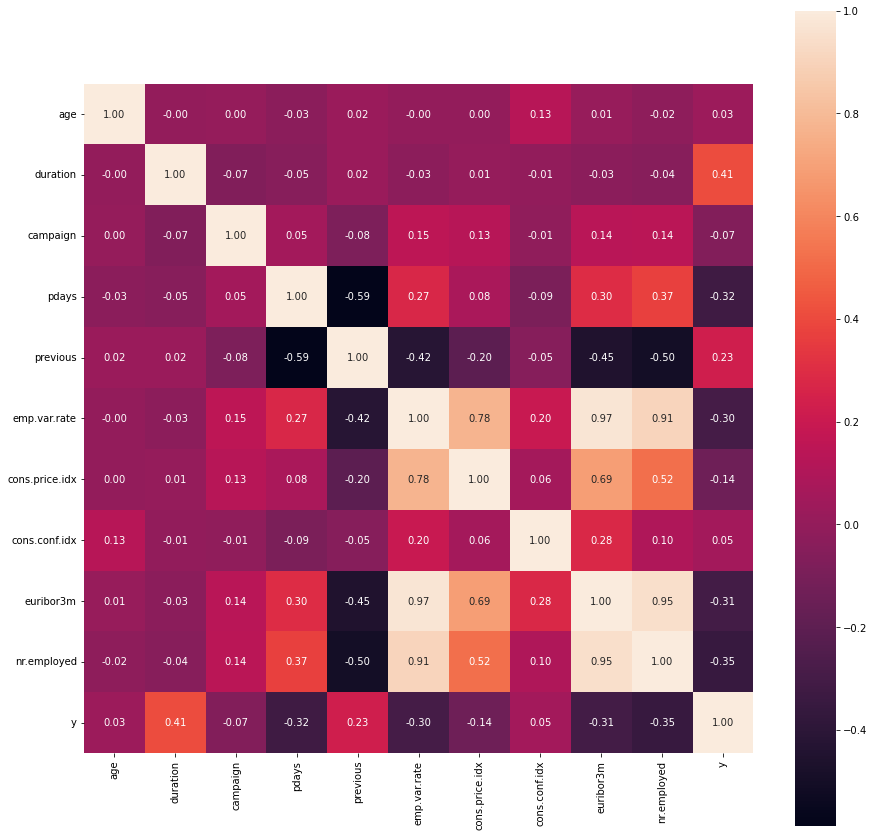

In [59]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')

dilihat dari heatmap diatas, saya menentukan treshold secara subjective dengan nilai +- 0.2

In [61]:
tresh = 0.2 #making treshold
goodCorr = [] #membuat list untuk nantinya di masukan features dengan good correlation

for i in df_num.columns.tolist():
    if df_num['y'].corr(df_num[i]) >= tresh or df_num['y'].corr(df_num[i]) <= -tresh:
        goodCorr.append(i)

kolom yang akan dijadikan feature adalah

In [62]:
goodCorr

['duration',
 'pdays',
 'previous',
 'emp.var.rate',
 'euribor3m',
 'nr.employed',
 'y']

# Data Preprocessing

## membuat duplikasi dataframe

In [63]:
df1 = df.copy()

menjadikan 1 antara semua kolom dengan datatype object dengan numeric data yang memiliki nilai korelasi dengan label

In [64]:
df1 = df[obj_col + goodCorr]

In [65]:
df1

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,duration,pdays,previous,emp.var.rate,euribor3m,nr.employed,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,261,999,0,1.1,4.857,5191.0,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,149,999,0,1.1,4.857,5191.0,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,226,999,0,1.1,4.857,5191.0,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,151,999,0,1.1,4.857,5191.0,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,307,999,0,1.1,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,334,999,0,-1.1,1.028,4963.6,1
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,383,999,0,-1.1,1.028,4963.6,0
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,189,999,0,-1.1,1.028,4963.6,0
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,442,999,0,-1.1,1.028,4963.6,1


In [66]:
df1.rename(columns={'emp.var.rate':'emp_var_rate', 'nr.employed' : 'np_employed'}, inplace=True)

In [67]:
x = df1.drop(df1.columns[-1], axis=1)
y = df1['y']

## train test split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8, stratify=y)

pendefinisian kolom obj dan numeric kolom pada data set x

In [69]:
obj_col = x.select_dtypes(include='object').columns.tolist()
num_col = x.select_dtypes(include=np.number).columns.tolist()

## Column Transformer

In [70]:
trf = ColumnTransformer(transformers=[
    ('number', StandardScaler(), num_col),
    ('obj', OneHotEncoder(sparse=False, drop='first'), obj_col)
], remainder='passthrough')

first_transform = trf.fit_transform(x_train)

#melihat hasil dari hasil tranform
pd.DataFrame(first_transform)

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-0.113062,0.196251,-0.350156,0.840022,0.774528,0.844937,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.765179,0.196251,-0.350156,-1.197191,-1.253452,-0.938452,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.439120,0.196251,1.662341,-0.114922,0.231504,0.398398,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.611739,0.196251,1.662341,-1.197191,-1.342227,-0.938452,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.139914,0.196251,3.674838,-1.897483,-1.579728,-1.255038,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,-0.872586,0.196251,-0.350156,0.840022,0.773375,0.844937,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
32946,-0.366237,0.196251,1.662341,-0.114922,0.329502,0.398398,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32947,-0.515840,0.196251,-0.350156,0.840022,0.777411,0.844937,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32948,-0.404596,0.196251,-0.350156,0.840022,0.718035,0.844937,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Pendefinisian Model

## Logistic regression

In [71]:
pipe_lr = Pipeline(steps=[
    ('tf', trf),
    ('model', LogisticRegression())
])

pipe_lr.fit(x_train, y_train)

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['duration', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'euribor3m',
                                                   'np_employed']),
                                                 ('obj',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                          

## SVM

In [72]:
pipe_svm = Pipeline(steps=[
    ('tf', trf),
    ('SVM', SVC(kernel='linear', C=0.5))
])

pipe_svm.fit(x_train, y_train)

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['duration', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'euribor3m',
                                                   'np_employed']),
                                                 ('obj',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                          

## Decision Tree

In [73]:
pipe_tree = Pipeline(steps=[
    ('tf', trf),
    ('tree', DecisionTreeClassifier(max_depth=10))
])

pipe_tree.fit(x_train, y_train)

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['duration', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'euribor3m',
                                                   'np_employed']),
                                                 ('obj',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                          

## Random Forest

In [74]:
pipe_rnf = Pipeline(steps=[
    ('tf', trf),
    ('RandomForest', RandomForestClassifier(n_estimators=100, max_depth=10))
])

pipe_rnf.fit(x_train, y_train)

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['duration', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'euribor3m',
                                                   'np_employed']),
                                                 ('obj',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                          

## K Nearest Neighbors

In [75]:
pipe_knn = Pipeline(steps=[
    ('tf', trf),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

pipe_knn.fit(x_train, y_train)

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['duration', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'euribor3m',
                                                   'np_employed']),
                                                 ('obj',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                          

## Naive Bayes

In [76]:
pipe_nbb = Pipeline(steps=[
    ('tf', trf),
    ('NaiveBernouli', BernoulliNB())
])

pipe_nbb.fit(x_train, y_train)

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['duration', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'euribor3m',
                                                   'np_employed']),
                                                 ('obj',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                          

## Gradient Boosting

In [77]:
pipe_grad = Pipeline(steps=[
    ('tf', trf),
    ('GradBoost', GradientBoostingClassifier(n_estimators=100, max_depth=2))
])

pipe_grad.fit(x_train, y_train)

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['duration', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'euribor3m',
                                                   'np_employed']),
                                                 ('obj',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                          

# Training Model

## Pendifinisian nilai prediksi dari model

In [78]:
y_lr = pipe_lr.predict(x_test)
print(f' score dari model Logistic Regression adalah {round(pipe_lr.score(x_test, y_test)*100 ,2)} % ')

 score dari model Logistic Regression adalah 91.16 % 


In [79]:
y_svm = pipe_svm.predict(x_test)
print(f' score dari model SVM Classifier adalah {round(pipe_svm.score(x_test, y_test)*100 ,2)} % ')

 score dari model SVM Classifier adalah 90.57 % 


In [80]:
y_tree = pipe_tree.predict(x_test)
print(f' score dari model Decision Tree adalah {round(pipe_tree.score(x_test, y_test)*100 ,2)} % ')

 score dari model Decision Tree adalah 91.13 % 


In [81]:
y_rnf = pipe_rnf.predict(x_test)
print(f' score dari model Random Forest adalah {round(pipe_rnf.score(x_test, y_test)*100 ,2)} % ')

 score dari model Random Forest adalah 91.43 % 


In [82]:
y_knn= pipe_knn.predict(x_test)
print(f' score dari model KNeighbours Classifier adalah {round(pipe_knn.score(x_test, y_test)*100 ,2)} % ')

 score dari model KNeighbours Classifier adalah 90.39 % 


In [83]:
y_nbb= pipe_nbb.predict(x_test)
print(f' score dari model Naive Bayes Bernouli adalah {round(pipe_nbb.score(x_test, y_test)*100 ,2)} % ')

 score dari model Naive Bayes Bernouli adalah 83.42 % 


In [84]:
y_grad= pipe_grad.predict(x_test)
print(f' score dari model Gradient Boosting adalah {round(pipe_grad.score(x_test, y_test)*100 ,2)} % ')

 score dari model Gradient Boosting adalah 91.31 % 


# Model Evaluation

## logistec regression

### Fit Observation

In [85]:
#check overfitt or not

print(f'Training Akurasi {round(pipe_lr.score(x_train, y_train)*100,2)} %')
print(f'Testing Akurasi {round(pipe_lr.score(x_test, y_test)*100,2)} %')

Training Akurasi 91.04 %
Testing Akurasi 91.16 %


hasil dari nilai training dan testing dari model logistic regression tidak terpaut jauh, yang menandakan model sudah good fit

### Confusion Matrix

In [86]:
cm = confusion_matrix(y_test, y_lr)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

print(f'\nAll Positives {cm[0,0] + cm[1,1]}')

print(f'\nAll Positives {cm[0,1] + cm[1,0]}')

Confusion matrix

 [[7119  191]
 [ 537  391]]

True Positives(TP) =  7119

True Negatives(TN) =  391

False Positives(FP) =  191

False Negatives(FN) =  537

All Positives 7510

All Positives 728


<AxesSubplot:>

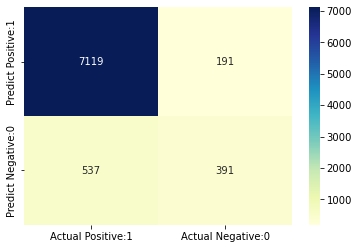

In [87]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

confusion matrix menunjukan bahwa model Logistec Regression **berhasil menebak** benar sebanyak `7510` dan **salah menebak** sebanyakn `728`

### Akurasi, Recall, dan Precision

In [88]:
#akurasi, recall, dan precision

print(f'Akurasi {round(accuracy_score(y_test, y_lr)*100, 2)} %')
print(f'Recall {round(metrics.recall_score(y_test, y_lr)*100, 2)} %')
print(f'Precision {round(metrics.precision_score(y_test, y_lr)*100, 2)} %')

Akurasi 91.16 %
Recall 42.13 %
Precision 67.18 %


### Cross Validation Akurasi, recall, dan Precision

In [89]:
Cross_validated_Akurasi = cross_val_score(pipe_lr, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy') #akurasi
Cross_validated_Recall = cross_val_score(pipe_lr, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='recall') #akurasi
Cross_validated_Precision = cross_val_score(pipe_lr, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='precision') #akurasi

print(f'Akurasi Score Cross Validation {round(Cross_validated_Akurasi.mean()*100,2)} %')
print(f'Recall Score Cross Validation {round(Cross_validated_Recall.mean()*100,2)} %')
print(f'Precision Score Cross Validation {round(Cross_validated_Precision.mean()*100,2)} %')


Akurasi Score Cross Validation 91.01 %
Recall Score Cross Validation 41.71 %
Precision Score Cross Validation nan %


### ROC AUC

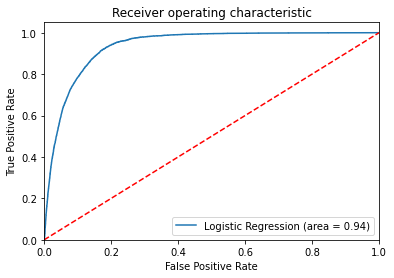

ROC AUC Score : 93.51 %


In [90]:
logit_roc_auc = roc_auc_score(y, pipe_lr.decision_function(x))
fpr, tpr, thresholds = roc_curve(y,pipe_lr.decision_function(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print(f'ROC AUC Score : {round(logit_roc_auc*100,2)} %')


### Cross validation ROC AUC

In [91]:
Cross_validated_ROC_AUC = cross_val_score(pipe_lr, x_train, y_train, cv=5, scoring='roc_auc')

print(f'ROC AUC Score Cross Validation {round(Cross_validated_ROC_AUC.mean()*100,2)} %')

ROC AUC Score Cross Validation 93.31 %


### Classification Report

In [92]:
report = classification_report(y_test, y_lr)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.67      0.42      0.52       928

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



## SVM

### Fit Observation

In [93]:
#check overfitt or not

print(f'Training Akurasi {round(pipe_svm.score(x_train, y_train)*100,2)} %')
print(f'Testing Akurasi {round(pipe_svm.score(x_test, y_test)*100,2)} %')

Training Akurasi 90.41 %
Testing Akurasi 90.57 %


### Confusion matrix

In [94]:
cm = confusion_matrix(y_test, y_svm)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

print(f'\nAll Positives {cm[0,0] + cm[1,1]}')

print(f'\nAll Positives {cm[0,1] + cm[1,0]}')

Confusion matrix

 [[7171  139]
 [ 638  290]]

True Positives(TP) =  7171

True Negatives(TN) =  290

False Positives(FP) =  139

False Negatives(FN) =  638

All Positives 7461

All Positives 777


<AxesSubplot:>

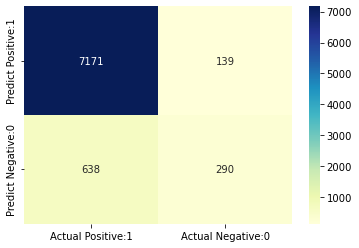

In [95]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Akurasi, Recall, dan Precision

In [96]:
#akurasi, recall, dan precision

print(f'Akurasi {round(accuracy_score(y_test, y_svm)*100, 2)} %')
print(f'Recall {round(metrics.recall_score(y_test, y_svm)*100, 2)} %')
print(f'Precision {round(metrics.precision_score(y_test, y_svm)*100, 2)} %')

Akurasi 90.57 %
Recall 31.25 %
Precision 67.6 %


### Cross validation Akurasi, Recall, dan Precision

In [97]:
Cross_validated_Akurasi = cross_val_score(pipe_svm, x, y, cv=5 , scoring='accuracy') #akurasi
Cross_validated_Recall = cross_val_score(pipe_svm, x, y, cv=5, scoring='recall') #akurasi
Cross_validated_Precision = cross_val_score(pipe_svm, x, y, cv=5, scoring='precision') #akurasi

print(f'Akurasi Score Cross Validation {round(Cross_validated_Akurasi.mean()*100,2)} %')
print(f'Recall Score Cross Validation {round(Cross_validated_Recall.mean()*100,2)} %')
print(f'Precision Score Cross Validation {round(Cross_validated_Precision.mean()*100,2)} %')


Akurasi Score Cross Validation 78.92 %
Recall Score Cross Validation 32.84 %
Precision Score Cross Validation 40.94 %


### ROC AUC

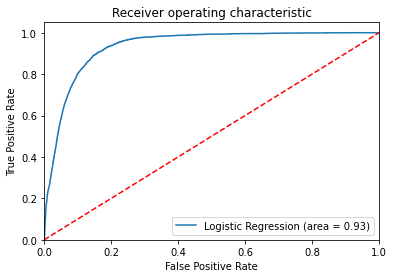

ROC AUC Score : 93.37 %


In [98]:
roc_auc = roc_auc_score(y, pipe_svm.decision_function(x))
fpr, tpr, thresholds = roc_curve(y,pipe_svm.decision_function(x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print(f'ROC AUC Score : {round(roc_auc*100,2)} %')


### Cross Validation ROC AUC

In [99]:
Cross_validated_ROC_AUC = cross_val_score(pipe_svm, x, y, cv=5, scoring='roc_auc')

print(f'ROC AUC Score Cross Validation {round(Cross_validated_ROC_AUC.mean()*100,2)} %')

ROC AUC Score Cross Validation 70.31 %


### Classification report

In [100]:
report = classification_report(y_test, y_svm)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.68      0.31      0.43       928

    accuracy                           0.91      8238
   macro avg       0.80      0.65      0.69      8238
weighted avg       0.89      0.91      0.89      8238



## Decision Tree

### Fit Observation

In [101]:
#check overfitt or not

print(f'Training Akurasi {round(pipe_tree.score(x_train, y_train)*100,2)} %')
print(f'Testing Akurasi {round(pipe_tree.score(x_test, y_test)*100,2)} %')

Training Akurasi 93.56 %
Testing Akurasi 91.13 %


### Confusion matrix

In [102]:
cm = confusion_matrix(y_test, y_tree)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

print(f'\nAll Positives {cm[0,0] + cm[1,1]}')

print(f'\nAll Positives {cm[0,1] + cm[1,0]}')

Confusion matrix

 [[7004  306]
 [ 425  503]]

True Positives(TP) =  7004

True Negatives(TN) =  503

False Positives(FP) =  306

False Negatives(FN) =  425

All Positives 7507

All Positives 731


<AxesSubplot:>

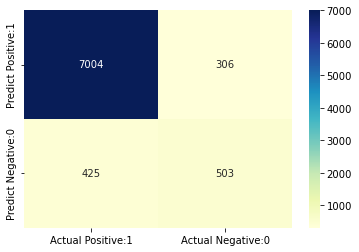

In [103]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Akurasi, Recall, Precision

In [104]:
#akurasi, recall, dan precision

print(f'Akurasi {round(accuracy_score(y_test, y_tree)*100, 2)} %')
print(f'Recall {round(metrics.recall_score(y_test, y_tree)*100, 2)} %')
print(f'Precision {round(metrics.precision_score(y_test, y_tree)*100, 2)} %')

Akurasi 91.13 %
Recall 54.2 %
Precision 62.18 %


### Cross Validation Akurasi, Recall, Precision

In [105]:
Cross_validated_Akurasi = cross_val_score(pipe_tree, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy') #akurasi
Cross_validated_Recall = cross_val_score(pipe_tree, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='recall') #akurasi
Cross_validated_Precision = cross_val_score(pipe_tree, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='precision') #akurasi

print(f'Akurasi Score Cross Validation {round(Cross_validated_Akurasi.mean()*100,2)} %')
print(f'Recall Score Cross Validation {round(Cross_validated_Recall.mean()*100,2)} %')
print(f'Precision Score Cross Validation {round(Cross_validated_Precision.mean()*100,2)} %')


Akurasi Score Cross Validation 90.77 %
Recall Score Cross Validation 53.55 %
Precision Score Cross Validation 61.11 %


### ROC AUC

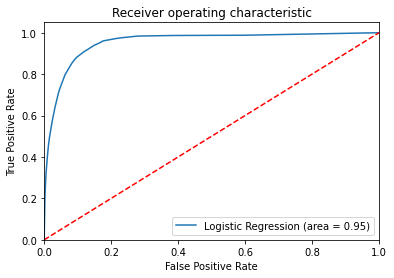

ROC AUC Score : 95.35 %


In [106]:
roc_auc = roc_auc_score(y, pipe_tree.predict_proba(x)[:, 1])
fpr, tpr, thresholds = roc_curve(y, pipe_tree.predict_proba(x)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print(f'ROC AUC Score : {round(roc_auc*100,2)} %')


### Cross Validation ROC AUC

In [107]:
Cross_validated_ROC_AUC = cross_val_score(pipe_tree, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='roc_auc')

print(f'ROC AUC Score Cross Validation {round(Cross_validated_ROC_AUC.mean()*100,2)} %')

ROC AUC Score Cross Validation 89.54 %


### Classification Report

In [108]:
report = classification_report(y_test, y_tree)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7310
           1       0.62      0.54      0.58       928

    accuracy                           0.91      8238
   macro avg       0.78      0.75      0.76      8238
weighted avg       0.91      0.91      0.91      8238



## RandomForest

### Fit Observation

In [109]:
#check overfitt or not

print(f'Training Akurasi {round(pipe_rnf.score(x_train, y_train)*100,2)} %')
print(f'Testing Akurasi {round(pipe_rnf.score(x_test, y_test)*100,2)} %')

Training Akurasi 92.8 %
Testing Akurasi 91.43 %


### Confusion Matrix

In [110]:
cm = confusion_matrix(y_test, y_rnf)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

print(f'\nAll Positives {cm[0,0] + cm[1,1]}')

print(f'\nAll Positives {cm[0,1] + cm[1,0]}')

Confusion matrix

 [[7205  105]
 [ 601  327]]

True Positives(TP) =  7205

True Negatives(TN) =  327

False Positives(FP) =  105

False Negatives(FN) =  601

All Positives 7532

All Positives 706


### Akurasi, Recall, Precision

In [111]:
#akurasi, recall, dan precision

print(f'Akurasi {round(accuracy_score(y_test, y_rnf)*100, 2)} %')
print(f'Recall {round(metrics.recall_score(y_test, y_rnf)*100, 2)} %')
print(f'Precision {round(metrics.precision_score(y_test, y_rnf)*100, 2)} %')

Akurasi 91.43 %
Recall 35.24 %
Precision 75.69 %


### Cross Validaition Akurasi, Recall, Precision

In [112]:
Cross_validated_Akurasi = cross_val_score(pipe_rnf, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy') #akurasi
Cross_validated_Recall = cross_val_score(pipe_rnf, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='recall') #akurasi
Cross_validated_Precision = cross_val_score(pipe_rnf, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='precision') #akurasi

print(f'Akurasi Score Cross Validation {round(Cross_validated_Akurasi.mean()*100,2)} %')
print(f'Recall Score Cross Validation {round(Cross_validated_Recall.mean()*100,2)} %')
print(f'Precision Score Cross Validation {round(Cross_validated_Precision.mean()*100,2)} %')


Akurasi Score Cross Validation 91.07 %
Recall Score Cross Validation 31.57 %
Precision Score Cross Validation 73.43 %


### ROC AUC

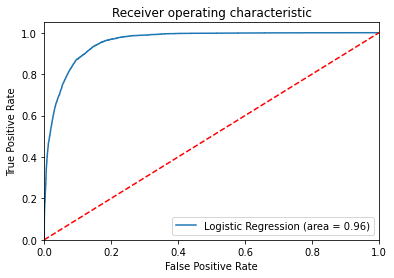

ROC AUC Score : 95.73 %


In [113]:
roc_auc = roc_auc_score(y, pipe_rnf.predict_proba(x)[:,1])
fpr, tpr, thresholds = roc_curve(y, pipe_rnf.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print(f'ROC AUC Score : {round(roc_auc*100,2)} %')


### Cross Validaition ROC AUC

In [114]:
Cross_validated_ROC_AUC = cross_val_score(pipe_rnf, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='roc_auc')

print(f'ROC AUC Score Cross Validation {round(Cross_validated_ROC_AUC.mean()*100,2)} %')

ROC AUC Score Cross Validation nan %


### Classification Report

In [115]:
report = classification_report(y_test, y_rnf)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7310
           1       0.76      0.35      0.48       928

    accuracy                           0.91      8238
   macro avg       0.84      0.67      0.72      8238
weighted avg       0.90      0.91      0.90      8238



## K Neighbours

### Fit Observation

In [116]:
#check overfitt or not

print(f'Training Akurasi {round(pipe_knn.score(x_train, y_train)*100,2)} %')
print(f'Testing Akurasi {round(pipe_knn.score(x_test, y_test)*100,2)} %')

Training Akurasi 92.97 %
Testing Akurasi 90.39 %


### Confusion Matrix

In [117]:
cm = confusion_matrix(y_test, y_knn)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

print(f'\nAll Positives {cm[0,0] + cm[1,1]}')

print(f'\nAll Positives {cm[0,1] + cm[1,0]}')

Confusion matrix

 [[7033  277]
 [ 515  413]]

True Positives(TP) =  7033

True Negatives(TN) =  413

False Positives(FP) =  277

False Negatives(FN) =  515

All Positives 7446

All Positives 792


### Akurasi, Recall, Precision

In [118]:
#akurasi, recall, dan precision

print(f'Akurasi {round(accuracy_score(y_test, y_knn)*100, 2)} %')
print(f'Recall {round(metrics.recall_score(y_test, y_knn)*100, 2)} %')
print(f'Precision {round(metrics.precision_score(y_test, y_knn)*100, 2)} %')

Akurasi 90.39 %
Recall 44.5 %
Precision 59.86 %


### Cross Validaition Akurasi, Recall, Precision

In [119]:
Cross_validated_Akurasi = cross_val_score(pipe_knn, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy') #akurasi
Cross_validated_Recall = cross_val_score(pipe_knn, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='recall') #akurasi
Cross_validated_Precision = cross_val_score(pipe_knn, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='precision') #akurasi

print(f'Akurasi Score Cross Validation {round(Cross_validated_Akurasi.mean()*100,2)} %')
print(f'Recall Score Cross Validation {round(Cross_validated_Recall.mean()*100,2)} %')
print(f'Precision Score Cross Validation {round(Cross_validated_Precision.mean()*100,2)} %')


Akurasi Score Cross Validation 90.2 %
Recall Score Cross Validation 43.46 %
Precision Score Cross Validation 59.14 %


### ROC AUC

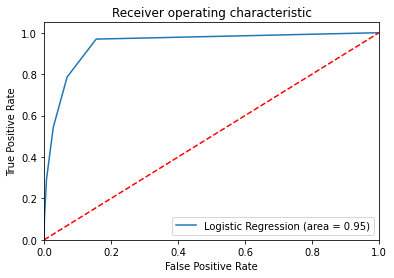

ROC AUC Score : 94.51 %


In [120]:
roc_auc = roc_auc_score(y, pipe_knn.predict_proba(x)[:, 1])
fpr, tpr, thresholds = roc_curve(y, pipe_knn.predict_proba(x)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print(f'ROC AUC Score : {round(roc_auc*100,2)} %')


### Cross Validaition ROC AUC

In [121]:
Cross_validated_ROC_AUC = cross_val_score(pipe_knn, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='roc_auc')

print(f'ROC AUC Score Cross Validation {round(Cross_validated_ROC_AUC.mean()*100,2)} %')

ROC AUC Score Cross Validation 86.53 %


### Classification Report

In [122]:
report = classification_report(y_test, y_knn)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7310
           1       0.60      0.45      0.51       928

    accuracy                           0.90      8238
   macro avg       0.77      0.70      0.73      8238
weighted avg       0.89      0.90      0.90      8238



## Naive Bayes

### Fit Observation

In [123]:
#check overfitt or not

print(f'Training Akurasi {round(pipe_nbb.score(x_train, y_train)*100,2)} %')
print(f'Testing Akurasi {round(pipe_nbb.score(x_test, y_test)*100,2)} %')

Training Akurasi 83.59 %
Testing Akurasi 83.42 %


### Confusion Matrix

In [124]:
cm = confusion_matrix(y_test, y_nbb)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

print(f'\nAll Positives {cm[0,0] + cm[1,1]}')

print(f'\nAll Positives {cm[0,1] + cm[1,0]}')

Confusion matrix

 [[6333  977]
 [ 389  539]]

True Positives(TP) =  6333

True Negatives(TN) =  539

False Positives(FP) =  977

False Negatives(FN) =  389

All Positives 6872

All Positives 1366


### Akurasi, Recall, Precision

In [125]:
#akurasi, recall, dan precision

print(f'Akurasi {round(accuracy_score(y_test, y_nbb)*100, 2)} %')
print(f'Recall {round(metrics.recall_score(y_test, y_nbb)*100, 2)} %')
print(f'Precision {round(metrics.precision_score(y_test, y_nbb)*100, 2)} %')

Akurasi 83.42 %
Recall 58.08 %
Precision 35.55 %


### Cross Validaition Akurasi, Recall, Precision

In [126]:
Cross_validated_Akurasi = cross_val_score(pipe_nbb, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy') #akurasi
Cross_validated_Recall = cross_val_score(pipe_nbb, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='recall') #akurasi
Cross_validated_Precision = cross_val_score(pipe_nbb, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='precision') #akurasi

print(f'Akurasi Score Cross Validation {round(Cross_validated_Akurasi.mean()*100,2)} %')
print(f'Recall Score Cross Validation {round(Cross_validated_Recall.mean()*100,2)} %')
print(f'Precision Score Cross Validation {round(Cross_validated_Precision.mean()*100,2)} %')


Akurasi Score Cross Validation 83.46 %
Recall Score Cross Validation 58.86 %
Precision Score Cross Validation 35.69 %


### ROC AUC

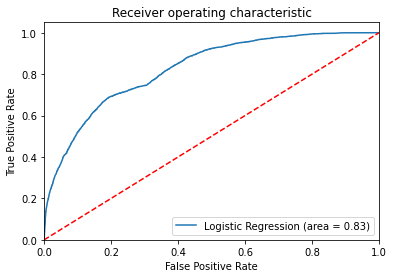

ROC AUC Score : 82.71 %


In [127]:
roc_auc = roc_auc_score(y, pipe_nbb.predict_proba(x)[:, 1])
fpr, tpr, thresholds = roc_curve(y, pipe_nbb.predict_proba(x)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print(f'ROC AUC Score : {round(roc_auc*100,2)} %')


### Cross Validaition ROC AUC

In [128]:
Cross_validated_ROC_AUC = cross_val_score(pipe_nbb, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='roc_auc')

print(f'ROC AUC Score Cross Validation {round(Cross_validated_ROC_AUC.mean()*100,2)} %')

ROC AUC Score Cross Validation 82.62 %


### Classification Report

In [129]:
report = classification_report(y_test, y_nbb)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      7310
           1       0.36      0.58      0.44       928

    accuracy                           0.83      8238
   macro avg       0.65      0.72      0.67      8238
weighted avg       0.88      0.83      0.85      8238



## Gradient Boosting

### Fit Observation

In [130]:
#check overfitt or not

print(f'Training Akurasi {round(pipe_grad.score(x_train, y_train)*100,2)} %')
print(f'Testing Akurasi {round(pipe_grad.score(x_test, y_test)*100,2)} %')

Training Akurasi 91.54 %
Testing Akurasi 91.31 %


### Confusion Matrix

In [131]:
cm = confusion_matrix(y_test, y_grad)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

print(f'\nAll Positives {cm[0,0] + cm[1,1]}')

print(f'\nAll Positives {cm[0,1] + cm[1,0]}')

Confusion matrix

 [[7046  264]
 [ 452  476]]

True Positives(TP) =  7046

True Negatives(TN) =  476

False Positives(FP) =  264

False Negatives(FN) =  452

All Positives 7522

All Positives 716


### Akurasi, Recall, Precision

In [132]:
#akurasi, recall, dan precision

print(f'Akurasi {round(accuracy_score(y_test, y_grad)*100, 2)} %')
print(f'Recall {round(metrics.recall_score(y_test, y_grad)*100, 2)} %')
print(f'Precision {round(metrics.precision_score(y_test, y_grad)*100, 2)} %')

Akurasi 91.31 %
Recall 51.29 %
Precision 64.32 %


### Cross Validaition Akurasi, Recall, Precision

In [133]:
Cross_validated_Akurasi = cross_val_score(pipe_grad, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy') #akurasi
Cross_validated_Recall = cross_val_score(pipe_grad, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='recall') #akurasi
Cross_validated_Precision = cross_val_score(pipe_grad, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='precision') #akurasi

print(f'Akurasi Score Cross Validation {round(Cross_validated_Akurasi.mean()*100,2)} %')
print(f'Recall Score Cross Validation {round(Cross_validated_Recall.mean()*100,2)} %')
print(f'Precision Score Cross Validation {round(Cross_validated_Precision.mean()*100,2)} %')


Akurasi Score Cross Validation 91.39 %
Recall Score Cross Validation 50.59 %
Precision Score Cross Validation 64.92 %


### ROC AUC

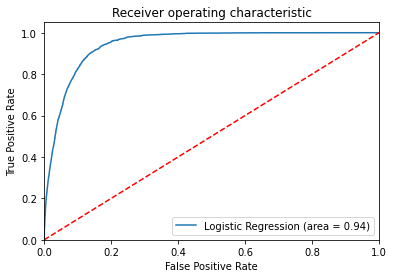

ROC AUC Score : 94.44 %


In [134]:
roc_auc = roc_auc_score(y, pipe_grad.predict_proba(x)[:, 1])
fpr, tpr, thresholds = roc_curve(y, pipe_grad.predict_proba(x)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print(f'ROC AUC Score : {round(roc_auc*100,2)} %')


### Cross Validaition ROC AUC

In [135]:
Cross_validated_ROC_AUC = cross_val_score(pipe_grad, x, y, cv=ms.KFold(n_splits=5, shuffle=True), scoring='roc_auc')

print(f'ROC AUC Score Cross Validation {round(Cross_validated_ROC_AUC.mean()*100,2)} %')

ROC AUC Score Cross Validation 94.29 %


### Classification Report

In [136]:
report = classification_report(y_test, y_grad)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7310
           1       0.64      0.51      0.57       928

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



## Hyper Parameter Turning

In [137]:
logparam_grid = [
    {'model__penalty' : ['l1', 'l2'], 'model__C':[0.1, 0.5, 0.7, 1]}
  ]

In [138]:
grid_searchlog = GridSearchCV(pipe_lr, param_grid= logparam_grid, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy', return_train_score=True)

grid_searchlog.fit(x, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('number',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp_var_rate',
                                                                          'euribor3m',
                                                                          'np_employed']),
                                                                        ('obj',
                          

In [139]:
grid_searchlog.best_estimator_

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['duration', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'euribor3m',
                                                   'np_employed']),
                                                 ('obj',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                          

Best Parameter untuk logistic regression adalah :
- penalty : l2
- C = 1

In [140]:
svmparam_grid = [
    {'SVM__kernel' : ['linear', 'rbf'], 'SVM__C':[0.1, 0.5, 1]}
  ]

In [141]:
grid_searchsvm = GridSearchCV(pipe_svm, param_grid= svmparam_grid, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy', return_train_score=True)

grid_searchsvm.fit(x, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('number',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp_var_rate',
                                                                          'euribor3m',
                                                                          'np_employed']),
                                                                        ('obj',
                          

In [142]:
grid_searchsvm.best_estimator_

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['duration', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'euribor3m',
                                                   'np_employed']),
                                                 ('obj',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                          

Best Parameter untuk SVM adalah :
- kernel : liner
- C = 1

In [143]:
treeparam_grid = [
    {'tree__criterion' : ['gini', 'entropy'], 'tree__max_depth':[1, 3, 5, 7, 10]}
  ]

In [144]:
grid_searchtree = GridSearchCV(pipe_tree, param_grid= treeparam_grid, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy', return_train_score=True)

grid_searchtree.fit(x, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('number',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp_var_rate',
                                                                          'euribor3m',
                                                                          'np_employed']),
                                                                        ('obj',
                          

In [145]:
grid_searchtree.best_estimator_

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['duration', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'euribor3m',
                                                   'np_employed']),
                                                 ('obj',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                          

Best Parameter untuk decision tree adalah :
- criterion : gini
- max_depth = 5

In [146]:
rnfparam_grid = [
    {'RandomForest__n_estimators' : [100,110,120,130,140,150], 'RandomForest__max_depth':[1, 3, 5, 7, 1]}
  ]

In [147]:
#grid search untuk accuracy

grid_searchrnf = GridSearchCV(pipe_rnf, param_grid= rnfparam_grid, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy', return_train_score=True)

grid_searchrnf.fit(x, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('number',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp_var_rate',
                                                                          'euribor3m',
                                                                          'np_employed']),
                                                                        ('obj',
                          

In [148]:
grid_searchrnf.best_estimator_

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['duration', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'euribor3m',
                                                   'np_employed']),
                                                 ('obj',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                          

Best Parameter untuk random forest adalah :
- max_depth = 7
- n_estimators = 110

In [149]:
knnparam_grid = [
    {'knn__n_neighbors' : [3, 5, 10]}
  ]

In [150]:
#grid search untuk accuracy

grid_searchknn = GridSearchCV(pipe_knn, param_grid= knnparam_grid, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy', return_train_score=True)

grid_searchknn.fit(x, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('number',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp_var_rate',
                                                                          'euribor3m',
                                                                          'np_employed']),
                                                                        ('obj',
                          

In [151]:
grid_searchknn.best_estimator_

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['duration', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'euribor3m',
                                                   'np_employed']),
                                                 ('obj',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                          

Best Parameter untuk Knearest neighbors adalah :
- n_neigbors : 10

In [152]:
nbbparam_grid = [
    {'NaiveBernouli__alpha' : [0, 1]}
  ]

In [153]:
#grid search untuk accuracy

grid_searchnbb = GridSearchCV(pipe_nbb, param_grid= nbbparam_grid, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy', return_train_score=True)

grid_searchnbb.fit(x, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('number',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp_var_rate',
                                                                          'euribor3m',
                                                                          'np_employed']),
                                                                        ('obj',
                          

In [154]:
grid_searchnbb.best_estimator_

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['duration', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'euribor3m',
                                                   'np_employed']),
                                                 ('obj',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                          

Best Parameter untuk naive bayes adalah :
- alpha : 1

In [155]:
gradparam_grid = [
    {'GradBoost__n_estimators' : [100,110,120,130,140,150], 'GradBoost__learning_rate':[0.1, 0.3, 0.5, 0.7, 1]}
  ]

In [156]:
#grid search untuk accuracy

grid_searchgrad = GridSearchCV(pipe_grad, param_grid= gradparam_grid, cv=ms.KFold(n_splits=5, shuffle=True), scoring='accuracy', return_train_score=True)

grid_searchgrad.fit(x, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('tf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('number',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp_var_rate',
                                                                          'euribor3m',
                                                                          'np_employed']),
                                                                        ('obj',
                          

In [157]:
grid_searchgrad.best_estimator_

Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['duration', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'euribor3m',
                                                   'np_employed']),
                                                 ('obj',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                          

In [158]:
log_final = grid_searchlog.best_estimator_
svm_final = grid_searchsvm.best_estimator_
tree_final = grid_searchtree.best_estimator_
rnf_final = grid_searchrnf.best_estimator_
knn_final = grid_searchknn.best_estimator_
nbb_final = grid_searchnbb.best_estimator_
grad_final = grid_searchgrad.best_estimator_

In [159]:
log_pred = log_final.predict(x)

score = cross_val_score(log_final, x, y, cv=ms.KFold(n_splits=5, shuffle=True))

print(f' Akurasi Test {round(log_final.score(x, y)*100, 2)} %')
print(f' Akurasi Cross Validation {round(score.mean()*100, 2)} %')

 Akurasi Test 91.11 %
 Akurasi Cross Validation 91.04 %


In [160]:
svm_pred = svm_final.predict(x)

score = cross_val_score(svm_final, x, y, cv=ms.KFold(n_splits=5, shuffle=True))

print(f' Akurasi Test {round(svm_final.score(x, y)*100, 2)} %')
print(f' Akurasi Cross Validation {round(score.mean()*100, 2)} %')

 Akurasi Test 92.06 %
 Akurasi Cross Validation 91.16 %


In [161]:
tree_pred = tree_final.predict(x)

score = cross_val_score(tree_final, x, y, cv=ms.KFold(n_splits=5, shuffle=True))

print(f' Akurasi Test {round(tree_final.score(x, y)*100, 2)} %')
print(f' Akurasi Cross Validation {round(score.mean()*100, 2)} %')

 Akurasi Test 88.73 %
 Akurasi Cross Validation 88.73 %


In [162]:
rnf_pred = rnf_final.predict(x)

score = cross_val_score(rnf_final, x, y, cv=ms.KFold(n_splits=5, shuffle=True))

print(f' Akurasi Test {round(rnf_final.score(x, y)*100, 2)} %')
print(f' Akurasi Cross Validation {round(score.mean()*100, 2)} %')

 Akurasi Test 90.77 %
 Akurasi Cross Validation 90.54 %


In [163]:
knn_pred = knn_final.predict(x)

score = cross_val_score(knn_final, x, y, cv=ms.KFold(n_splits=5, shuffle=True))

print(f' Akurasi Test {round(knn_final.score(x, y)*100, 2)} %')
print(f' Akurasi Cross Validation {round(score.mean()*100, 2)} %')

 Akurasi Test 91.92 %
 Akurasi Cross Validation nan %


In [164]:
nbb_pred = nbb_final.predict(x)

score = cross_val_score(nbb_final, x, y, cv=ms.KFold(n_splits=5, shuffle=True))

print(f' Akurasi Test {round(nbb_final.score(x, y)*100, 2)} %')
print(f' Akurasi Cross Validation {round(score.mean()*100, 2)} %')

 Akurasi Test 83.47 %
 Akurasi Cross Validation 83.43 %


In [165]:
grad_pred = grad_final.predict(x)

score = cross_val_score(grad_final, x, y, cv=ms.KFold(n_splits=5, shuffle=True))

print(f' Akurasi Test {round(grad_final.score(x, y)*100, 2)} %')
print(f' Akurasi Cross Validation {round(score.mean()*100, 2)} %')

 Akurasi Test 92.11 %
 Akurasi Cross Validation 91.59 %


Dari semua model yang telah dilakukan hyperparameter tuning, hasil score akurasi tertinggi adalah model Gradient Boosting

In [166]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", trf),
        ("GradBoost", GradientBoostingClassifier(learning_rate=0.3, max_depth=2, n_estimators=150))
    ])

full_pipeline_with_predictor.fit(x, y)

Pipeline(steps=[('preparation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number', StandardScaler(),
                                                  ['duration', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'euribor3m',
                                                   'np_employed']),
                                                 ('obj',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                 

In [169]:
my_model = full_pipeline_with_predictor

In [170]:
import joblib
joblib.dump(my_model, "my_model_final.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model_final.pkl") # DIFF

# Kesimpulan

## Model Analysis

Dari hasil testing dan training model diatas, dapat diambil beberapa kesimpulan bahwa :
- Semua model menunjukan hasil yang baik dengan fit yang baik (GoodFit), dilihat dari semua metric terutama yang saya jadikan acuan adalah akurasi
- Setelah dilakukan Hyperparameter Tuning model tidak mengalami kenaikan performa secara signifikan.

Dengan acuan metric `Akurasi`, saya memilih untuk menggunakan model `Gradient Boosting` dengan parameter **Learning Rate = 0,3**, **Max_depth = 2**, dan **n_estimators = 150**

## Overall Analysis

dari hasil obeservasi dan explorasi data sederhana, dapat diambil kesimpulan bahwa :
- Data telah bersih dari missing value
- Data Label termasuk kedalam imbalnce data yang dapat dilihat dari visualisasi data diatas
- Terdapat banyak sekali kolom numeric yang bisa dijadikan feature untuk masuk kedalam model machine learning, hal ini dapat dilihat dari nilai korelasi banyak yang melibihi treshold yang saya tentukan yakni +-0.2